### Introduction to Financial Instruments and Derivatives

- **Two main categories of financial instruments:**
  - **Underlying assets**: Stocks, bonds, commodities, foreign currencies.
  - **Derivatives**: Contracts whose value depends on the behavior of an underlying asset.

- **Purpose of derivatives:**
  - Can **reduce risk** (e.g., locking in prices for future transactions).
  - Can **magnify risk** (e.g., speculative bets on price movements without needing capital to buy the asset outright).

- **Dependency and complexity:**
  - Derivatives depend on underlying assets.
  - However, the relationship is complex and both asset types are actively traded.

- **Randomness and structure:**
  - Asset prices and derivatives appear random.
  - But randomness in finance often has **hidden structure**.

- **Mathematical approach:**
  - Use **probability and expectation theory** to model and understand the link between derivative prices and their underlying assets.

- **Warning:**
  - There are **many misleading ideas** in the field.
  - One particularly deceptive idea (to be addressed next) is the temptation to equate value with expected payoff.


### 1.1 Expectation Pricing

- **Simple game example**: Payoff is $1 for heads, $0 for tails.
  - If the coin is fair, expected payoff = \( 0.5 \times 1 + 0.5 \times 0 = 0.50 \).
  - Suggests 50 cents is a fair price to play the game.

- **Formal expectation**: 
  - Derived from assigning fixed probabilities to outcomes.
  - Expected value = weighted average of possible outcomes.

- **Kolmogorov’s Strong Law of Large Numbers**:
  - Over many independent trials, the average outcome converges to the expected value.
  - Implies that pricing based on expectation is valid **in the long run**.

- **Limitation of expectation pricing**:
  - Does **not enforce** price fairness in **a single trial**.
  - Example: Playing once for 40 cents might have high expected profit, but is risky—no guarantee.

- **Market implication**:
  - Prices can deviate from expected value in the short term.
  - Nevertheless, expectation provides a useful **guide** or **baseline** for pricing.


> The following code demonstrates, through simulation, that the average profit per play converges to the expected value as the number of plays increases, and highlights the importance of fair pricing in repeated games.

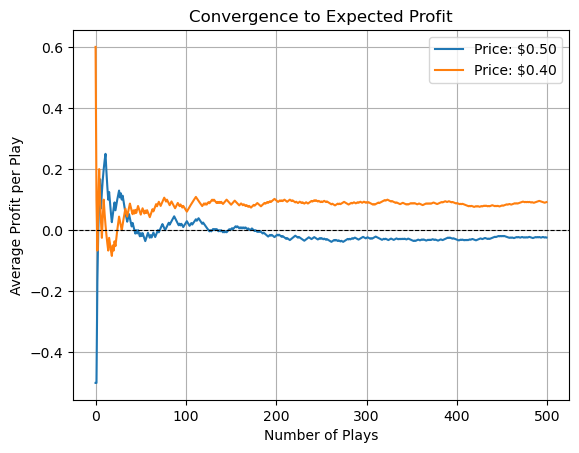

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
prob_head = 0.5        # Fair coin
payout_head = 1        # $1 for heads
payout_tail = 0        # $0 for tails
cost_to_play = 0.5     # Fair price
cheap_price = 0.4      # Undervalued price

# Simulate n coin tosses
def simulate_game(n, price_per_play):
    # Randomly choose heads ($1) or tails ($0), n times, using the given probabilities(prob_head for heads, 1 - prob_head for tails)
    outcomes = np.random.choice([payout_head, payout_tail], size=n, p=[prob_head, 1 - prob_head])
    net_profits = outcomes - price_per_play  # Subtract the cost of playing to get profit/loss per play
    return net_profits

# Run simulation for increasing number of plays
n_trials = 500
prices = [cost_to_play, cheap_price]
fig, ax = plt.subplots()

for price in prices:
    profits = simulate_game(n_trials, price)
   # Compute the running average profit after each play:
    # - np.cumsum(profits) gives the cumulative total profit at each step
    # - np.arange(1, n_trials + 1) gives the number of plays so far: [1, 2, 3, ..., n]
    # Dividing them gives the average profit per play over time
    cumulative_avg = np.cumsum(profits) / np.arange(1, n_trials + 1)
    label = f"Price: ${price:.2f}"
    ax.plot(cumulative_avg, label=label)

# Plot formatting
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax.set_xlabel('Number of Plays')
ax.set_ylabel('Average Profit per Play')
ax.set_title('Convergence to Expected Profit')
ax.legend()
plt.grid(True)
plt.show()


### Time Value of Money

- In the earlier example, payment and payoff happened at the same time — simplifying analysis.
- Now consider the coin game where:
  - You pay **now** (e.g. January)
  - The game outcome and payoff happen **later** (e.g. December)
- A future dollar is worth **less today** — this is the *time value of money*.

#### Interest and Discounting
- We model interest using a constant **continuously compounded rate** \( r > 0 \).
- The present value of \$1 received at future time \( T \) is:
  $$ \text{PV} = \exp(-rT) $$

#### Applying to the Coin Game
- Expected payoff = 0.50 dollars (from Section 1.1)
- Since this is paid at time \( T \), its present value is:
  $$ 0.50 \cdot \exp(-rT) $$
- This is the **strong-law price adjusted for time**.


,Years Ahead (T),Discounted Strong-Law Price (now)
0,0,0.500000
1,1,0.475615
2,2,0.452419
3,3,0.430354
4,4,0.409365
5,5,0.389400
6,6,0.370409
7,7,0.352344
8,8,0.335160
9,9,0.318814


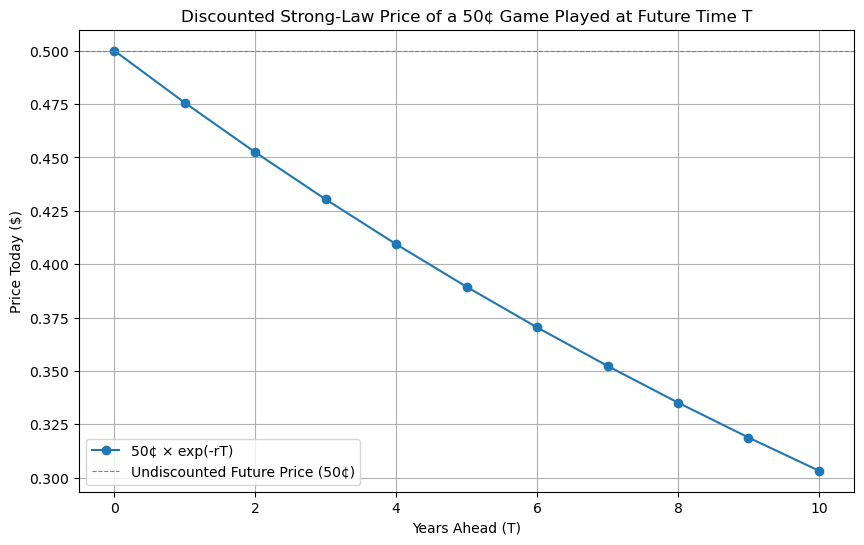

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# Parameters
r = 0.05                      # Interest rate (5%)
T_years = np.arange(0, 11)    # Time from 0 to 10 years
future_payment = 0.50         # Expected payoff at time T (50 cents)

# Calculate discounted price today (strong-law price)
discounted_prices = [future_payment * exp(-r * T) for T in T_years]

# Build and display DataFrame
df = pd.DataFrame({
    "Years Ahead (T)": T_years,
    "Discounted Strong-Law Price (now)": discounted_prices
})
display(df)  # Use this in Jupyter to show the table

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_years, discounted_prices, marker='o', label='50¢ × exp(-rT)')
plt.axhline(future_payment, color='gray', linestyle='--', linewidth=0.8, label='Undiscounted Future Price (50¢)')
plt.title('Discounted Strong-Law Price of a 50¢ Game Played at Future Time T')
plt.xlabel('Years Ahead (T)')
plt.ylabel('Price Today ($)')
plt.legend()
plt.grid(True)
plt.show()


### Stocks, Not Coins

- Real markets use **log-normal models** for stock prices:  
  $S_T = S_0 \cdot \exp(X), \quad X \sim N(\mu, \sigma^2)$

- A **forward contract** promises to buy the stock at time $T$ for a fixed price $K$.
- Payoff at maturity: $S_T - K$
- Present value: $\exp(-rT)(S_T - K)$

#### Fair Pricing Condition
To avoid arbitrage:
$$ \mathbb{E}[\exp(-rT)(S_T - K)] = 0 $$

This implies:
$$ K = \mathbb{E}[S_T] $$

#### Expected Stock Price
Since $S_T = S_0 \cdot \exp(X)$ and $X \sim N(\mu, \sigma^2)$, we apply:
$$ \mathbb{E}[S_T] = S_0 \cdot \exp\left(\mu + \frac{1}{2}\sigma^2\right) $$

This gives the **strong-law price** of the forward contract — fair under the assumption of log-normal stock returns.



### Forward Pricing via Simulation (Strong Law Justification)

This simulation demonstrates how to compute the fair forward price for a stock using the strong law of large numbers and the log-normal model for stock prices. It helps understand the code below.

---

### Step 1: Set Model Parameters

```python
S0 = 100
mu = 0.1
sigma = 0.2
r = 0.05
T = 1.0
n_simulations = 100000
```

- `S0`: Current stock price
- `mu`: Expected log-return over time `T`
- `sigma`: Volatility of returns
- `r`: Risk-free interest rate
- `T`: Time to maturity (in years)
- `n_simulations`: Number of simulated future stock price paths

---

### Step 2: Simulate Log-Returns

```python
X = np.random.normal(loc=mu, scale=sigma, size=n_simulations)
```

Simulate `X ~ N(mu, sigma^2)` to model the **logarithmic return** of the stock.

---

### Step 3: Calculate Future Stock Prices

```python
ST = S0 * np.exp(X)
```

Apply the log-normal model:  
$S_T = S_0 \cdot \exp(X)$  
This gives us 100,000 possible future prices of the stock at time `T`.

---

### Step 4: Define the Forward Pricing Function

```python
def forward_pv(K):
    payoff = ST - K
    discounted_payoff = np.exp(-r * T) * payoff
    return np.mean(discounted_payoff)
```

This function calculates the **expected present value** of a forward contract:
- Payoff = $S_T - K$
- Discounted back using $\exp(-rT)$
- Averaged over all simulations.
- Returns the average present value across all simulations
⇒ i.e., the expected present value of entering the forward at strike K

---

### Step 5: Calculate the Fair Forward Price

```python
fair_K = np.mean(ST)
```

The **fair forward price** is the value of $K$ that makes:
$$
\mathbb{E}[\exp(-rT)(S_T - K)] = 0
\quad \Rightarrow \quad
K = \mathbb{E}[S_T]
$$

---

### Step 6: Evaluate PV for a Range of Strikes

```python
K_values = np.linspace(fair_K - 20, fair_K + 20, 100)
PV_values = [forward_pv(K) for K in K_values]
```

We test a range of strike prices to see how the expected present value of the forward contract changes — showing when it becomes a good or bad deal.

---


,Strike Price (K),Expected PV of Forward
0,92.653320,19.024588
1,93.057360,18.640253
2,93.461400,18.255918
3,93.865441,17.871583
4,94.269481,17.487248
...,...,...
95,131.037158,-17.487248
96,131.441198,-17.871583
97,131.845239,-18.255918
98,132.249279,-18.640253


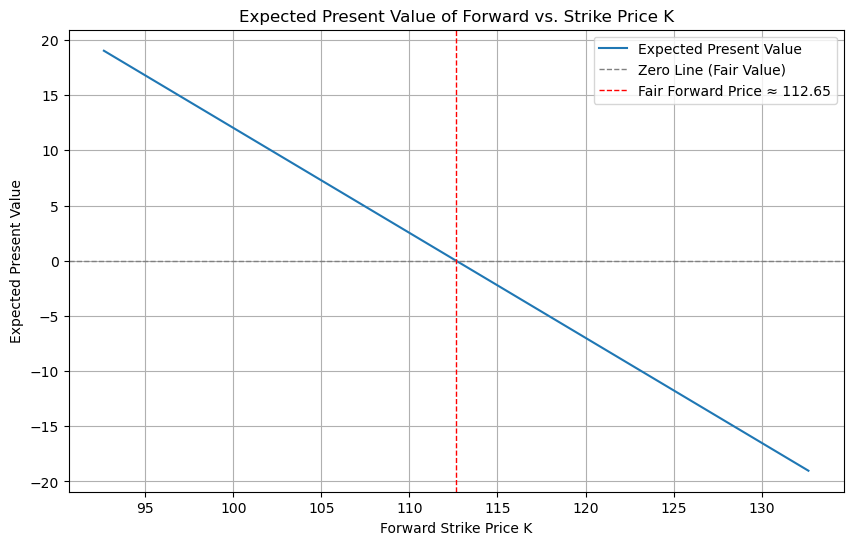

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# Parameters
S0 = 100               # Initial stock price
mu = 0.1               # Expected return
sigma = 0.2            # Volatility
r = 0.05               # Risk-free interest rate
T = 1.0                # Time to maturity in years
n_simulations = 100000  # Number of simulated outcomes

# Simulate X ~ N(mu, sigma^2)
X = np.random.normal(loc=mu, scale=sigma, size=n_simulations)

# Simulate stock price at maturity: S_T = S_0 * exp(X)
ST = S0 * np.exp(X)

# Function to compute expected present value of forward payoff for a given strike K
def forward_pv(K):
    payoff = ST - K
    discounted_payoff = np.exp(-r * T) * payoff
    return np.mean(discounted_payoff) # Expected present value of the forward payoff

# Fair forward price is where expected PV = 0
fair_K = np.mean(ST)

# Generate a range of strike prices around fair_K
K_values = np.linspace(fair_K - 20, fair_K + 20, 100)
PV_values = [forward_pv(K) for K in K_values]

# Create a DataFrame to examine values numerically
df = pd.DataFrame({
    "Strike Price (K)": K_values,
    "Expected PV of Forward": PV_values
})
display(df)  # Use this to display the table in Jupyter

# Plot the expected present value vs. K
plt.figure(figsize=(10, 6))
plt.plot(K_values, PV_values, label='Expected Present Value')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero Line (Fair Value)')
plt.axvline(fair_K, color='red', linestyle='--', linewidth=1, label=f'Fair Forward Price ≈ {fair_K:.2f}')
plt.title("Expected Present Value of Forward vs. Strike Price K")
plt.xlabel("Forward Strike Price K")
plt.ylabel("Expected Present Value")
plt.legend()
plt.grid(True)
plt.show()
